In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


In [2]:
#1

In [3]:
NRAdata=pd.read_csv('/Users/mirapatel/Downloads/nra-grades.csv')

Obtaining necessary subsets. Making a subset for each party with variables Year, Grade, Party.  

In [4]:
#creating two sub-sets of grade year and party (party is not necessary)
house=NRAdata[(NRAdata.iloc[:,1]=="US House")&(NRAdata.iloc[:,4]=="General")]
house_R=house[house.iloc[:,6]=="R"] #republican house candidates
house_D=house[house.iloc[:,6]=="D"] 
house_D=house_D[["grade","year","party"]]
house_R=house_R[["grade","year","party"]]
grades=['A+','A','AQ','A-','B+','B','B-','C+','C','C-','D+','D','D-','F','?'] #creating a list to reindex 

Creating draw_barchart function which will obtain the counts for each grade for each party given the year input

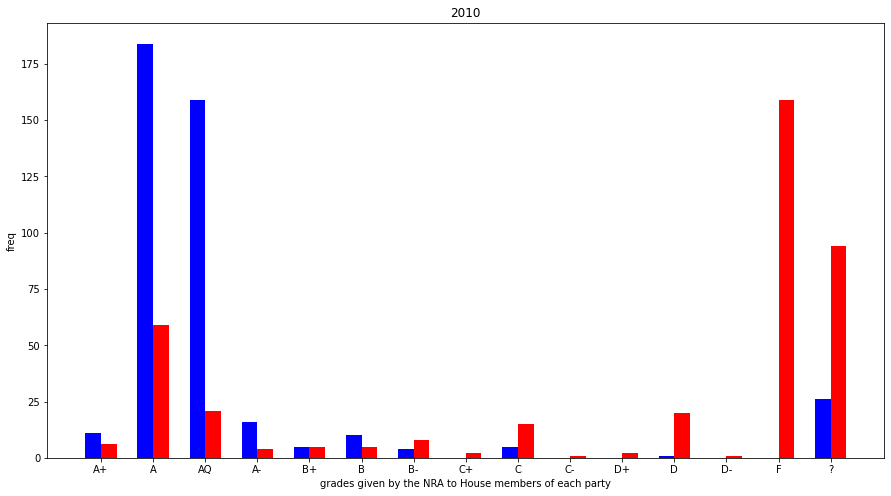

In [5]:
fig, ax = plt.subplots(figsize=(15, 8)) #initializing plot 
xpos=np.arange(len(grades))  #evenly spaced x positions
plt.xticks(xpos,grades)
title=["Frequency of NRA grade assesments by party "]
def draw_barchart(year):
    house_D1=house_D[house_D['year'].eq(year)].grade.value_counts() #getting value counts for each grade based on the year that matches the arguement
    house_D1=house_D1.reindex(grades,fill_value=0)
    house_R1=house_R[house_R['year'].eq(year)].grade.value_counts()
    house_R1=house_R1.reindex(grades,fill_value=0)
    plt.bar(x=xpos+0.15,height=house_D1,label="Republican",width=0.3,color="red")  #plotting the counts for the given year
    plt.bar(x=xpos-0.15,height=house_R1,width=0.3,label="Democrat",color="blue")
    plt.xticks(xpos,grades)
    plt.xlabel("grades given by the NRA to House members of each party")
    plt.ylabel("freq")
    plt.title(year)

draw_barchart(2010)


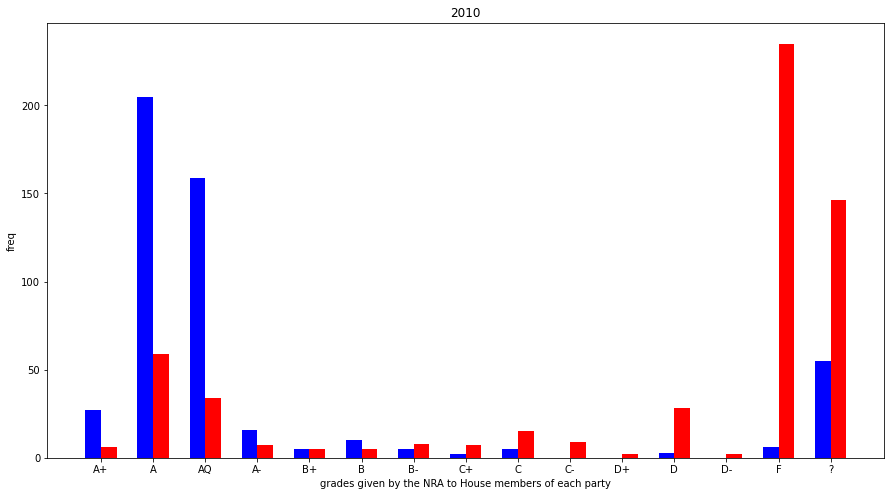

In [6]:

#setting the frames to a list of the years inside the func animate function and we are telling it to animate "fig"
#which is the bar graph that will change through the years
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart,frames=[2010,2012,2014,2016],interval=1000)
HTML(animator.to_jshtml()) 